### Chargement du dataset

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_path = "ml-100k/u.data"
columns = ["user_id", "movie_id", "rating", "timestamp"]
data = pd.read_csv(data_path, sep="\t", names=columns)
display(data)
data.info()

user_path = "ml-100k/u.user"
columns = ["user_id", "age", "sex", "job","postal_code"]
user = pd.read_csv(user_path, sep="|", names=columns)
display(user)
user.info()

genre_path = "ml-100k/u.genre"
columns = ["genre", "genre_id"]
genre = pd.read_csv(genre_path, sep="|",names=columns, encoding="latin-1")

item_path = "ml-100k/u.item"
columns = ["movie_id", "title", "date", "?","imdb_link"] + genre.sort_values(by="genre_id")["genre"].tolist()
item = pd.read_csv(item_path, sep="|",names=columns, encoding="latin-1")
item=item.drop("?",axis=1)
display(item)
item.info()

ml= pd.merge(left=data,right=item[['movie_id','title']],on='movie_id',how='left')
display(ml)

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   movie_id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


,user_id,age,sex,job,postal_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      943 non-null    int64 
 1   age          943 non-null    int64 
 2   sex          943 non-null    object
 3   job          943 non-null    object
 4   postal_code  943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


,movie_id,title,date,imdb_link,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movie_id     1682 non-null   int64 
 1   title        1682 non-null   object
 2   date         1681 non-null   object
 3   imdb_link    1679 non-null   object
 4   unknown      1682 non-null   int64 
 5   Action       1682 non-null   int64 
 6   Adventure    1682 non-null   int64 
 7   Animation    1682 non-null   int64 
 8   Children's   1682 non-null   int64 
 9   Comedy       1682 non-null   int64 
 10  Crime        1682 non-null   int64 
 11  Documentary  1682 non-null   int64 
 12  Drama        1682 non-null   int64 
 13  Fantasy      1682 non-null   int64 
 14  Film-Noir    1682 non-null   int64 
 15  Horror       1682 non-null   int64 
 16  Musical      1682 non-null   int64 
 17  Mystery      1682 non-null   int64 
 18  Romance      1682 non-null   int64 
 19  Sci-Fi       1682 non-null 

,user_id,movie_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)
...,...,...,...,...,...
99995,880,476,3,880175444,"First Wives Club, The (1996)"
99996,716,204,5,879795543,Back to the Future (1985)
99997,276,1090,1,874795795,Sliver (1993)
99998,13,225,2,882399156,101 Dalmatians (1996)


### Analyse

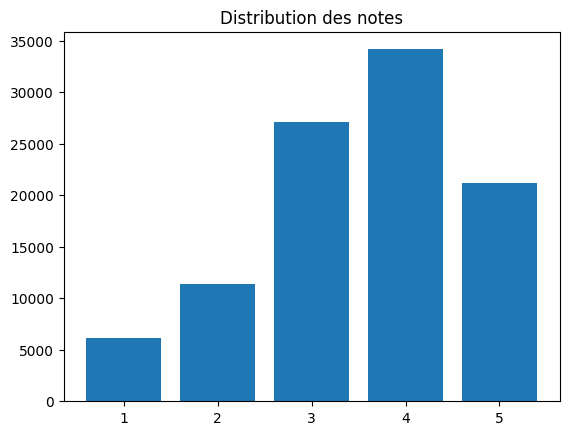

In [18]:
ratings = ml['rating'].value_counts()
plt.bar(ratings.index,ratings)
plt.title("Distribution des notes")
plt.show()

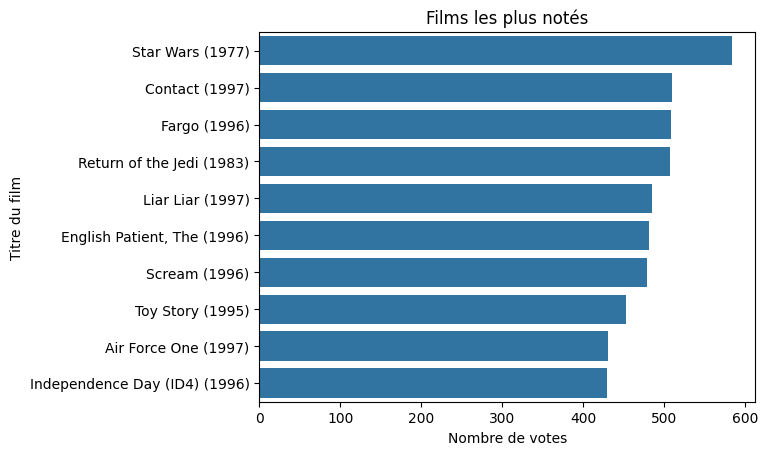

In [21]:
top_votes = ml['title'].value_counts().head(10)
sns.barplot(y=top_votes.index, x=top_votes.values, orient = 'h')
plt.title("Films les plus notés")
plt.xlabel("Nombre de votes")
plt.ylabel("Titre du film")
plt.show()

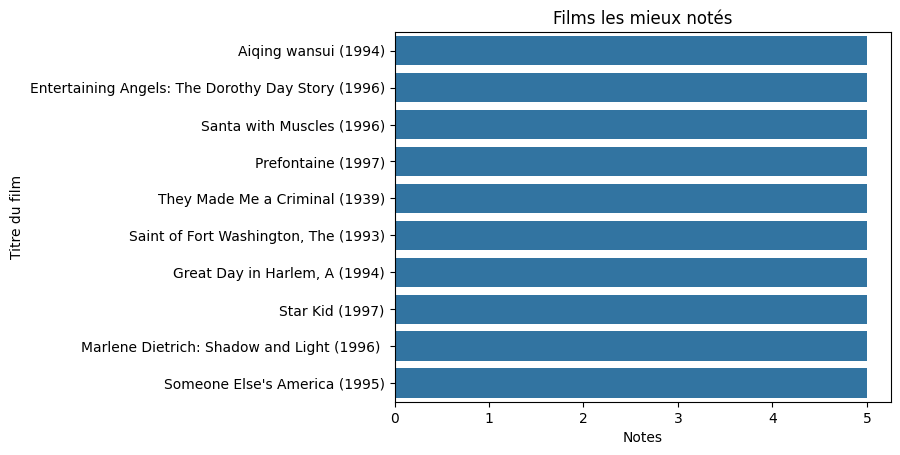

In [24]:
top_ratings = ml.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)
sns.barplot(y=top_ratings.index, x=top_ratings.values, orient = 'h')
plt.title("Films les mieux notés")
plt.xlabel("Notes")
plt.ylabel("Titre du film")
plt.show()

,title,count,mean,moy_bay
0,'Til There Was You (1997),9,2.333333,2.980151
1,1-900 (1994),5,2.600000,3.040379
2,101 Dalmatians (1996),109,2.908257,2.968234
3,12 Angry Men (1957),125,4.344000,3.932642
4,187 (1997),41,3.024390,3.055675
...,...,...,...,...
1659,Young Guns II (1990),44,2.772727,2.948399
1660,"Young Poisoner's Handbook, The (1995)",41,3.341463,3.184265
1661,Zeus and Roxanne (1997),6,2.166667,2.994379
1662,unknown,9,3.444444,3.124877


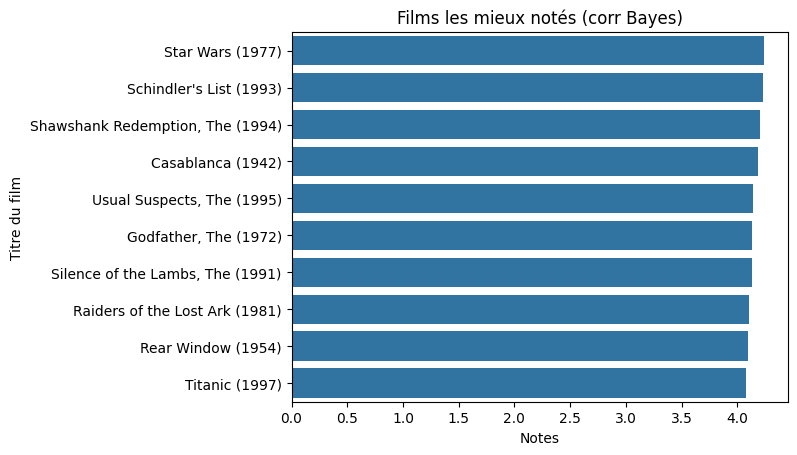

In [25]:
# Moyenne bayesienne par film
def moy_bayesienne(C,M,S,n):
    return((C*M+S)/(C+n))
# C = nombre de notes d'un film, en moyenne
# M = moyenne des notes d'un film, en moyenne
# S = vecteur de la somme des notes, pour chaque film
# n = vecteur du nbre de notes, pour chaque film 

movie_stats = ml.groupby('title')['rating'].agg(['count','mean']).reset_index()
C = movie_stats['count'].mean()
M = movie_stats['mean'].mean()
S = movie_stats['count']*movie_stats['mean']
n = movie_stats['count']

# On ajoute une colonne moyenne bayesienne pour chaque film
movie_stats['moy_bay'] = moy_bayesienne(C,M,S=movie_stats['count']*movie_stats['mean'],n=movie_stats['count'])
display(movie_stats)

top_ratings_bayes = movie_stats.sort_values(by=["moy_bay"],ascending=False).head(10)
sns.barplot(y=top_ratings_bayes['title'], x=top_ratings_bayes['moy_bay'].values, orient = 'h')
plt.title("Films les mieux notés (corr Bayes)")
plt.xlabel("Notes")
plt.ylabel("Titre du film")
plt.show()


### Approche mémoire user-user

In [30]:
# Création matrice de notation
mat_ratings = ml.pivot_table(index=ml['user_id'],columns=ml['title'],values='rating')
display(mat_ratings)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# On remplace les valeurs manquantes par 0 
mat_ratings = mat_ratings.fillna(0)

# On crée une sparse Matrix
from scipy.sparse import csr_matrix
sparse_ratings = csr_matrix(mat_ratings)

print(sparse_ratings)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 99693 stored elements and shape (943, 1664)>
  Coords	Values
  (0, 2)	2.0
  (0, 3)	5.0
  (0, 6)	3.0
  (0, 7)	4.0
  (0, 16)	3.0
  (0, 17)	3.0
  (0, 31)	1.0
  (0, 35)	4.0
  (0, 36)	4.0
  (0, 41)	5.0
  (0, 44)	5.0
  (0, 46)	1.0
  (0, 50)	5.0
  (0, 76)	4.0
  (0, 84)	5.0
  (0, 87)	3.0
  (0, 88)	4.0
  (0, 93)	2.0
  (0, 94)	4.0
  (0, 104)	4.0
  (0, 109)	1.0
  (0, 113)	5.0
  (0, 115)	2.0
  (0, 127)	3.0
  (0, 131)	1.0
  :	:
  (942, 1478)	3.0
  (942, 1488)	1.0
  (942, 1495)	5.0
  (942, 1497)	2.0
  (942, 1507)	4.0
  (942, 1513)	4.0
  (942, 1516)	4.0
  (942, 1524)	5.0
  (942, 1525)	4.0
  (942, 1533)	4.0
  (942, 1534)	5.0
  (942, 1537)	4.0
  (942, 1559)	5.0
  (942, 1560)	3.0
  (942, 1572)	5.0
  (942, 1581)	2.0
  (942, 1615)	4.0
  (942, 1632)	2.0
  (942, 1633)	4.0
  (942, 1641)	1.0
  (942, 1644)	3.0
  (942, 1645)	2.0
  (942, 1653)	1.0
  (942, 1658)	4.0
  (942, 1659)	3.0


In [38]:
# On crée la matrice de similarité des utilisateurs
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
user_similarity = cosine_similarity(sparse_ratings)
df_user_similarity = pd.DataFrame(user_similarity,index=mat_ratings.index.values,columns=mat_ratings.index.values)

display(df_user_similarity)

,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
1,1.000000,0.168937,0.048388,0.064561,0.379670,0.429682,0.443097,0.320079,0.078385,0.377733,...,0.372213,0.119860,0.269860,0.193343,0.197949,0.118722,0.315064,0.149086,0.181612,0.399432
2,0.168937,1.000000,0.113393,0.179694,0.073623,0.242106,0.108604,0.104257,0.162470,0.161273,...,0.147095,0.310661,0.363328,0.410725,0.322713,0.231096,0.228793,0.162911,0.175273,0.106732
3,0.048388,0.113393,1.000000,0.349781,0.021592,0.074018,0.067423,0.084419,0.062039,0.066217,...,0.033885,0.043453,0.167140,0.071288,0.126278,0.026758,0.164539,0.102899,0.136757,0.026990
4,0.064561,0.179694,0.349781,1.000000,0.031804,0.068431,0.091507,0.188060,0.101284,0.060859,...,0.054615,0.036784,0.133619,0.196561,0.146058,0.030202,0.196858,0.152041,0.171538,0.058752
5,0.379670,0.073623,0.021592,0.031804,1.000000,0.238636,0.374733,0.248930,0.056847,0.201427,...,0.340183,0.080580,0.095284,0.081053,0.148607,0.071612,0.239955,0.139595,0.153799,0.313941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.118722,0.231096,0.026758,0.030202,0.071612,0.112729,0.104394,0.096103,0.039937,0.071613,...,0.066452,0.432078,0.259553,0.230558,0.433593,1.000000,0.087875,0.180415,0.043727,0.144559
940,0.315064,0.228793,0.164539,0.196858,0.239955,0.354454,0.330926,0.246883,0.120495,0.342961,...,0.328495,0.107024,0.188246,0.184212,0.175158,0.087875,1.000000,0.145152,0.263608,0.241028
941,0.149086,0.162911,0.102899,0.152041,0.139595,0.145268,0.060175,0.146145,0.143245,0.090305,...,0.047145,0.203301,0.289410,0.237951,0.313400,0.180415,0.145152,1.000000,0.102510,0.095120
942,0.181612,0.175273,0.136757,0.171538,0.153799,0.312264,0.285273,0.176818,0.093287,0.214143,...,0.230352,0.074140,0.090695,0.132746,0.100234,0.043727,0.263608,0.102510,1.000000,0.184022


In [ ]:
# Prédictions de notes d'un utilisateur à partir des notes des k utilisateurs les plus similaires
def pred_user(mat_ratings, user_similarity, k, user_id):

    # Sélectionner dans la matrice de notation les films qui n'ont pas été encore notés par le user
    to_predict = mat_ratings.loc[user_id][mat_ratings.loc[user_id]==0]

    # Sélectionner les k users les plus similaires en excluant le user lui-même
    similar_users = user_similarity.loc[user_id].sort_values(ascending=False)[1:k+1]

    # Pour chaque film à prédire
    for i in to_predict.index:
        # Récupérer les notes des users similaires associées au film
        ratings = mat_ratings[i].loc[similar_users.index]
        
        # Calculer le produit scalaire entre ratings et similar_users
        scalar_prod = np.dot(ratings,similar_users)

        # Calcul de la norme du vecteur similar_users
        norm = np.sum(np.abs(similar_users))
        
        #Calculer la note prédite pour le film
        pred = scalar_prod / norm

        # Stocker la note prédite
        to_predict[i] = pred

    return to_predict

In [45]:
# Préférences actuelles de l'utilisateur 666
userId = 666
user_preferences = mat_ratings.loc[userId].sort_values(ascending=False).head(10)
display(user_preferences)

# 10 meilleures notes prédites basées sur les 5 plus proches utilisateurs
user_recommandations = pred_user(mat_ratings, df_user_similarity, 5, userId).sort_values(ascending=False).head(10)
display(user_recommandations)

title
African Queen, The (1951)       5.0
Alien (1979)                    5.0
Thin Man, The (1934)            5.0
Schindler's List (1993)         5.0
Rebel Without a Cause (1955)    5.0
Shining, The (1980)             5.0
Rainmaker, The (1997)           5.0
Ran (1985)                      5.0
My Man Godfrey (1936)           5.0
Night on Earth (1991)           5.0
Name: 666, dtype: float64

title
Secrets & Lies (1996)                                         4.405703
Field of Dreams (1989)                                        4.009757
Deer Hunter, The (1978)                                       4.008736
Killing Fields, The (1984)                                    4.008150
My Favorite Year (1982)                                       4.000000
My Left Foot (1989)                                           3.815893
Singin' in the Rain (1952)                                    3.788076
Like Water For Chocolate (Como agua para chocolate) (1992)    3.603969
Ben-Hur (1959)                                                3.421723
Postino, Il (1994)                                            3.416148
Name: 666, dtype: float64

### Approche mémoire item-item

In [46]:
# On crée une sparse Matrix à partir de la matrice de notation transposée => lignes = items
sparse_ratings = csr_matrix(mat_ratings.T)

print(sparse_ratings)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 99693 stored elements and shape (1664, 943)>
  Coords	Values
  (0, 151)	4.0
  (0, 177)	3.0
  (0, 222)	1.0
  (0, 298)	2.0
  (0, 341)	1.0
  (0, 415)	3.0
  (0, 529)	2.0
  (0, 531)	3.0
  (0, 781)	2.0
  (1, 180)	1.0
  (1, 384)	4.0
  (1, 404)	1.0
  (1, 580)	4.0
  (1, 832)	3.0
  (2, 0)	2.0
  (2, 4)	2.0
  (2, 12)	2.0
  (2, 14)	3.0
  (2, 37)	5.0
  (2, 42)	2.0
  (2, 44)	4.0
  (2, 48)	2.0
  (2, 55)	2.0
  (2, 56)	3.0
  (2, 59)	3.0
  :	:
  (1660, 757)	5.0
  (1660, 772)	4.0
  (1660, 827)	2.0
  (1660, 856)	3.0
  (1660, 860)	4.0
  (1660, 864)	5.0
  (1660, 867)	3.0
  (1660, 870)	3.0
  (1660, 935)	5.0
  (1661, 81)	2.0
  (1661, 180)	3.0
  (1661, 462)	1.0
  (1661, 791)	3.0
  (1661, 797)	3.0
  (1661, 880)	1.0
  (1662, 0)	4.0
  (1662, 4)	4.0
  (1662, 129)	5.0
  (1662, 267)	3.0
  (1662, 296)	3.0
  (1662, 318)	4.0
  (1662, 421)	4.0
  (1662, 531)	3.0
  (1662, 832)	1.0
  (1663, 654)	3.0


In [47]:
# On crée la matrice de similarité des items

item_similarity = cosine_similarity(sparse_ratings)
df_item_similarity = pd.DataFrame(item_similarity,index=mat_ratings.columns.values,columns=mat_ratings.columns.values)

display(df_item_similarity)

,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
'Til There Was You (1997),1.000000,0.000000,0.024561,0.099561,0.185236,0.159265,0.000000,0.052203,0.000000,0.033326,...,0.000000,0.000000,0.000000,0.027774,0.118840,0.142315,0.029070,0.000000,0.110208,0.000000
1-900 (1994),0.000000,1.000000,0.014139,0.009294,0.007354,0.004702,0.010055,0.067038,0.000000,0.000000,...,0.152499,0.015484,0.000000,0.069284,0.018243,0.023408,0.006694,0.079640,0.042295,0.000000
101 Dalmatians (1996),0.024561,0.014139,1.000000,0.167006,0.061105,0.143878,0.203781,0.225803,0.027642,0.092337,...,0.000000,0.021965,0.030905,0.274877,0.204267,0.101199,0.056976,0.172155,0.045714,0.000000
12 Angry Men (1957),0.099561,0.009294,0.167006,1.000000,0.056822,0.167235,0.304078,0.422506,0.072682,0.394854,...,0.060946,0.016502,0.000000,0.403270,0.259436,0.145519,0.105226,0.038901,0.060101,0.081261
187 (1997),0.185236,0.007354,0.061105,0.056822,1.000000,0.132327,0.042928,0.065060,0.043133,0.027300,...,0.000000,0.141997,0.000000,0.068257,0.067786,0.091293,0.099490,0.025184,0.142667,0.096449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns II (1990),0.142315,0.023408,0.101199,0.145519,0.091293,0.225578,0.109645,0.163646,0.000000,0.074020,...,0.153493,0.000000,0.000000,0.256593,0.621260,1.000000,0.051655,0.000000,0.099333,0.000000
"Young Poisoner's Handbook, The (1995)",0.029070,0.006694,0.056976,0.105226,0.099490,0.196235,0.120116,0.155034,0.039261,0.063504,...,0.000000,0.013371,0.000000,0.133463,0.097146,0.051655,1.000000,0.022923,0.000000,0.175581
Zeus and Roxanne (1997),0.000000,0.079640,0.172155,0.038901,0.025184,0.064405,0.017218,0.026388,0.000000,0.021899,...,0.000000,0.053025,0.000000,0.054753,0.000000,0.000000,0.022923,1.000000,0.000000,0.000000
unknown,0.110208,0.042295,0.045714,0.060101,0.142667,0.042755,0.064008,0.096697,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.101775,0.058064,0.099333,0.000000,0.000000,1.000000,0.000000


In [48]:
# Prédictions de notes d'un utilisateur à partir de ses notes sur les k films les plus similaires 
def pred_item(mat_ratings, item_similarity, k, user_id):

    # Sélectionner dans la matrice de notation les films qui n'ont pas été encore notés par le user
    to_predict = mat_ratings.loc[user_id][mat_ratings.loc[user_id]==0]
    
    # Itérer sur tous ces lifilmsvres 
    for i in to_predict.index:

        #Trouver les k films les plus similaires en excluant le film lui-même
        similar_items = item_similarity.loc[i].sort_values(ascending=False)[1:k+1]

        # Récupérer les notes données par l'utilisateur aux k plus proches films
        ratings = mat_ratings.loc[user_id,similar_items.index.values]

        # Calculer le produit scalaire entre ratings et similar_items
        scalar_prod = np.dot(ratings,similar_items)

        # Calcul de la norme du vecteur similar_items
        norm = np.sum(np.abs(similar_items))
        
        #Calculer la note prédite pour le film
        pred = scalar_prod/norm

        # Stocker la note
        to_predict[i] = pred


    return to_predict

In [49]:
# Préférences actuelles de l'utilisateur 666
userId = 666
user_preferences = mat_ratings.loc[userId].sort_values(ascending=False).head(10)
display(user_preferences)

# 10 meilleures notes prédites basées sur les 5 plus proches films
user_recommandations = pred_item(mat_ratings, df_item_similarity, 5, userId).sort_values(ascending=False).head(10)
display(user_recommandations)

title
African Queen, The (1951)       5.0
Alien (1979)                    5.0
Thin Man, The (1934)            5.0
Schindler's List (1993)         5.0
Rebel Without a Cause (1955)    5.0
Shining, The (1980)             5.0
Rainmaker, The (1997)           5.0
Ran (1985)                      5.0
My Man Godfrey (1936)           5.0
Night on Earth (1991)           5.0
Name: 666, dtype: float64

title
39 Steps, The (1935)          4.395411
Candidate, The (1972)         4.391043
Mother (1996)                 4.390542
Ed Wood (1994)                4.388964
Wild Bunch, The (1969)        4.373536
Ben-Hur (1959)                4.219038
12 Angry Men (1957)           4.208034
Killing Fields, The (1984)    4.207526
My Left Foot (1989)           4.202849
Forbidden Planet (1956)       4.198119
Name: 666, dtype: float64